**Estadística Aplicada**

**Edwin Javier Hernández Rodríguez**

**Sesion 14- 14 Marzo 2023**

De acuerdo con el enfoque clasico una serie puede tener 4 componentes:
1. Tendencia
2. Estacional
3. Cíclico
4. Irregular

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from statsmodels.tsa.api import seasonal_decompose

In [12]:
# Leer datos
confirmados = pd.read_excel('covid_mex.xlsx')

In [13]:
confirmados

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2023-03-08,16,86,45,1,1,37,969,49,57,...,75,57,48,4,32,41,85,8,22,3083
1107,2023-03-09,14,76,50,0,1,25,930,81,27,...,67,32,40,3,23,41,82,19,13,2749
1108,2023-03-10,9,49,42,2,1,17,531,34,22,...,25,13,31,3,16,18,36,9,13,1522
1109,2023-03-11,0,1,6,1,0,1,106,7,9,...,2,1,1,1,3,1,11,1,6,305


In [14]:
confirmados['fechas'] = pd.to_datetime(confirmados['fecha'])

In [15]:
# fecha lo hicimos el index
confirmados = confirmados.set_index('fecha')

In [16]:
confirmados.head()

,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,durango,...,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional,fechas
fecha,,,,,,,,,,,,,,,,,,,,,
2020-02-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-02-26
2020-02-27,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,4,2020-02-27
2020-02-28,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2020-02-28
2020-02-29,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2020-02-29
2020-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2020-03-01


In [18]:
confirmados.index.freq = 'D'

In [20]:
confirmados.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-11', '2023-03-12'],
              dtype='datetime64[ns]', name='fecha', length=1111, freq='D')

Siempre, siempre hay que graficar la serie

Text(0.5, 1.0, 'Casos confirmados COVID19 Nuevo León')

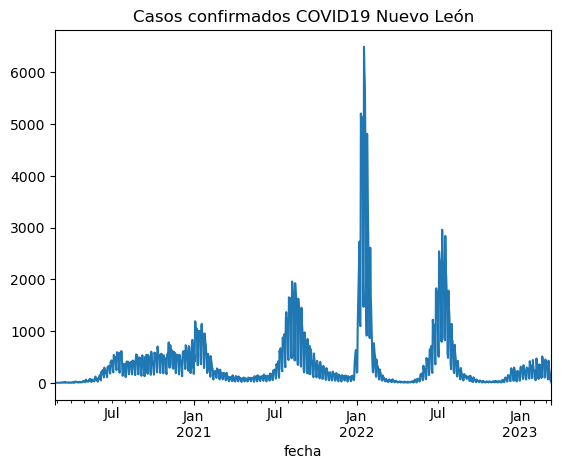

In [24]:
confirmados['nuevo leon'].plot()
plt.title('Casos confirmados COVID19 Nuevo León')


(18322.0, 18597.0)

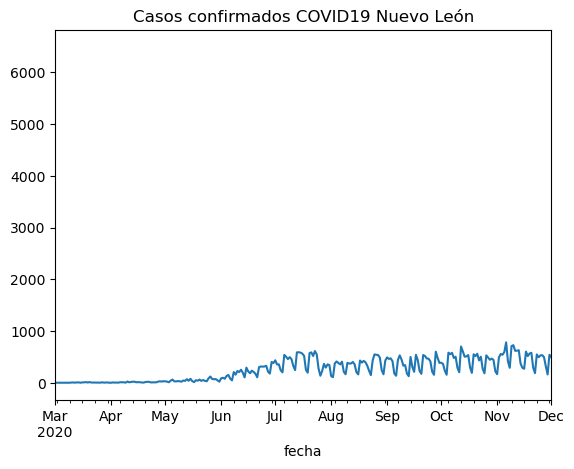

In [26]:
confirmados['nuevo leon'].plot()
plt.title('Casos confirmados COVID19 Nuevo León')
plt.xlim('2020-03', '2020-12')

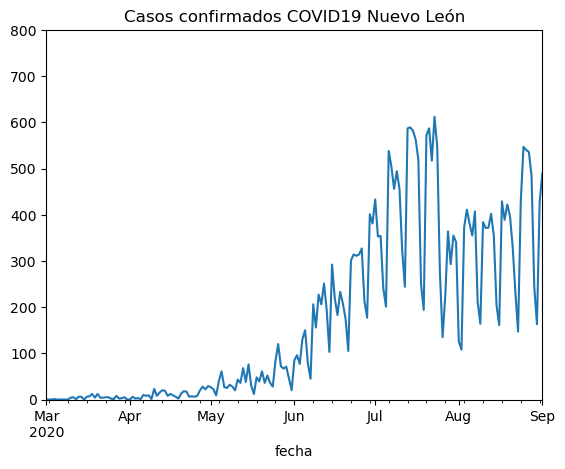

In [27]:
confirmados['nuevo leon'].plot()
plt.title('Casos confirmados COVID19 Nuevo León')
plt.xlim('2020-03', '2020-09')
plt.ylim(0,800)
plt.show()

Se ve como la serie tiende a ser estacional, picos bajos y altos pueden ser entre semana y fin de semana

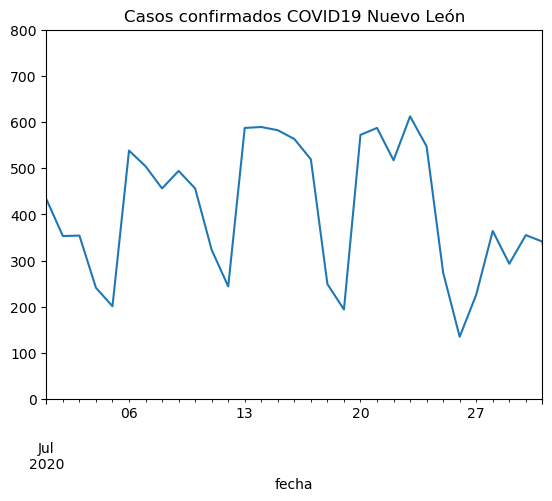

In [30]:
confirmados['nuevo leon'].plot()
plt.title('Casos confirmados COVID19 Nuevo León')
plt.xlim('2020-07-01', '2020-07-31')
plt.ylim(0,800)
plt.show()

In [32]:
cv_nl = seasonal_decompose(confirmados['nuevo leon'], model= 'Ad') #modelo aditivo

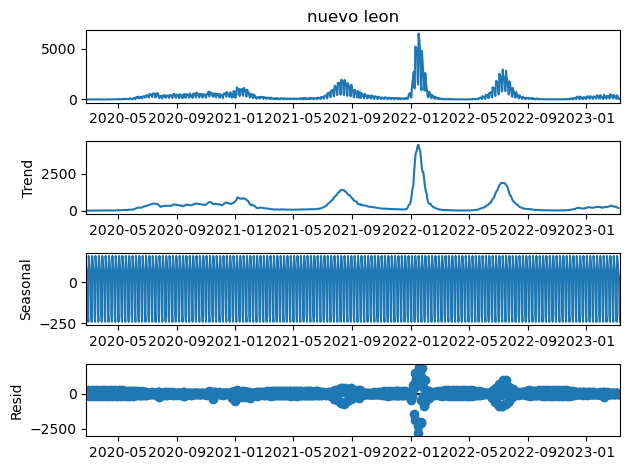

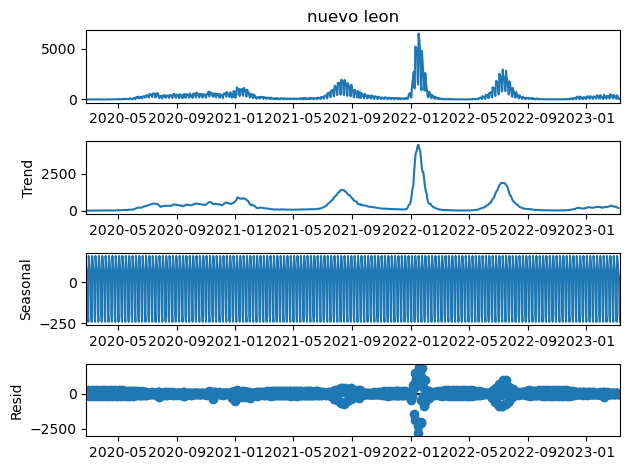

In [33]:
cv_nl.plot()

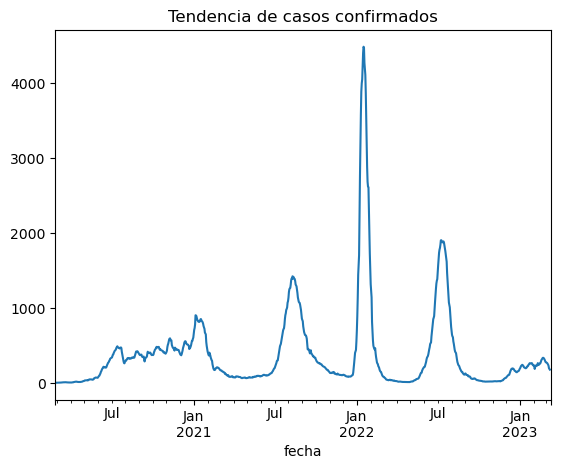

In [34]:
cv_nl.trend.plot()
plt.title('Tendencia de casos confirmados')
plt.show()

In [36]:
#Modelo ETS (Error-Trend-Seasonally)
#Modelo de tendencia estacional irregular
cv_nl.seasonal.head(10)

fecha
2020-02-26     84.392443
2020-02-27     54.877976
2020-02-28     26.227621
2020-02-29   -201.151861
2020-03-01   -241.946617
2020-03-02    158.510888
2020-03-03    119.089550
2020-03-04     84.392443
2020-03-05     54.877976
2020-03-06     26.227621
Freq: D, Name: seasonal, dtype: float64

# Métodos de Suavizamiento
Los métodos de suavizamiento tratan de extraer la tendencia (tendencia-ciclo)

# Promedio móvil (MA mooving average)

In [41]:
nuevo_leon = confirmados[['nuevo leon']] #con doble corchete se hace dataframe

In [40]:
nuevo_leon

,nuevo leon
fecha,
2020-02-26,0
2020-02-27,0
2020-02-28,0
2020-02-29,0
2020-03-01,0
...,...
2023-03-08,235
2023-03-09,180
2023-03-10,60


In [42]:
nuevo_leon['desestacionalizada'] = nuevo_leon['nuevo leon'] - cv_nl.seasonal

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\3191436982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['desestacionalizada'] = nuevo_leon['nuevo leon'] - cv_nl.seasonal


<AxesSubplot:xlabel='fecha'>

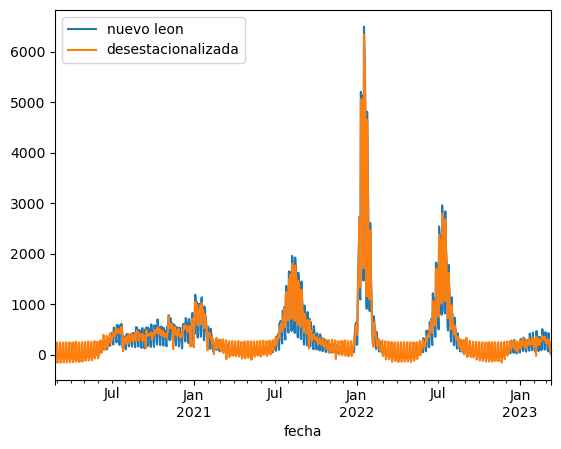

In [43]:
nuevo_leon.plot()

In [57]:
nuevo_leon['PMS-7'] = nuevo_leon['nuevo leon'].rolling(window=7).mean() #Promedio movil simple de dos periodos
nuevo_leon['PMS-15'] = nuevo_leon['nuevo leon'].rolling(window=15).mean() #Promedio movil simple de dos periodos

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\4123687404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['PMS-7'] = nuevo_leon['nuevo leon'].rolling(window=7).mean() #Promedio movil simple de dos periodos
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\4123687404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['PMS-15'] = nuevo_leon['nuevo leon'].rolling(window=15).mean() #Promedio movil simple de dos periodos


In [58]:
nuevo_leon.head(10)

,nuevo leon,desestacionalizada,PMS-7,PMS-15
fecha,,,,
2020-02-26,0,-84.392443,NaN,NaN
2020-02-27,0,-54.877976,NaN,NaN
2020-02-28,0,-26.227621,NaN,NaN
2020-02-29,0,201.151861,NaN,NaN
2020-03-01,0,241.946617,NaN,NaN
2020-03-02,0,-158.510888,NaN,NaN
2020-03-03,0,-119.089550,0.000000,NaN
2020-03-04,1,-83.392443,0.142857,NaN
2020-03-05,0,-54.877976,0.142857,NaN


<AxesSubplot:xlabel='fecha'>

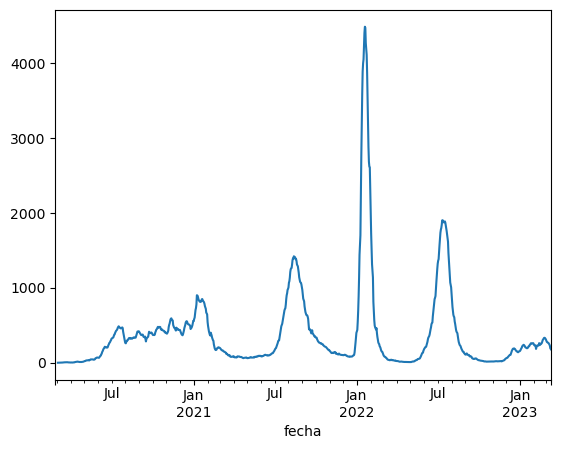

In [56]:
nuevo_leon['PMS-7'].plot()

In [60]:
#promedio movil centrado
nuevo_leon['PMC-7'] = nuevo_leon['nuevo leon'].rolling(window=7, center=True).mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1980\1440970328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_leon['PMC-7'] = nuevo_leon['nuevo leon'].rolling(window=7, center=True).mean()


<AxesSubplot:xlabel='fecha'>

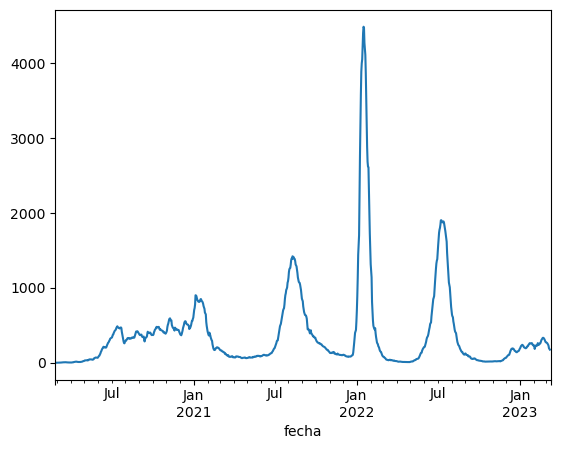

In [62]:
nuevo_leon['PMC-7'].plot()

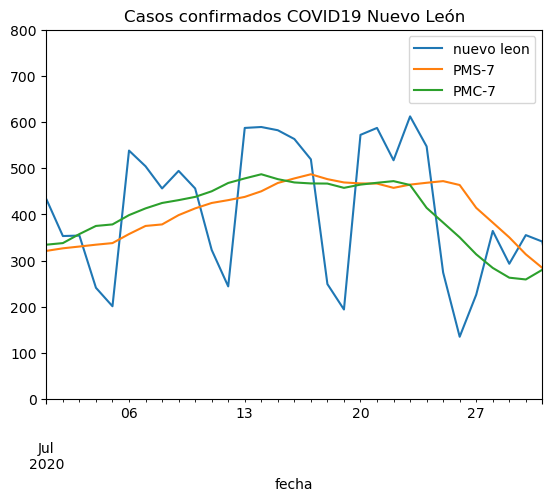

In [63]:
nuevo_leon[['nuevo leon', 'PMS-7', 'PMC-7']].plot()
plt.title('Casos confirmados COVID19 Nuevo León')
plt.xlim('2020-07-01', '2020-07-31')
plt.ylim(0,800)
plt.show()

Actividad


In [66]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col = 'Month', parse_dates =True)

In [67]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [71]:
pasajeros['PMS-3'] = pasajeros['Thousands of Passengers'].rolling(window=3).mean() #Promedio movil simple de dos periodos
pasajeros['PMS-7'] = pasajeros['Thousands of Passengers'].rolling(window=7).mean() #Promedio movil simple de dos periodos

In [72]:
pasajeros.head(15)

,Thousands of Passengers,PMS-7,PMS-15,PMS-3
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,120.666667
1949-04-01,129,NaN,NaN,126.333333
1949-05-01,121,NaN,NaN,127.333333
1949-06-01,135,NaN,NaN,128.333333
1949-07-01,148,127.857143,127.857143,134.666667
1949-08-01,148,133.000000,133.000000,143.666667
1949-09-01,136,135.571429,135.571429,144.000000


<AxesSubplot:xlabel='Month'>

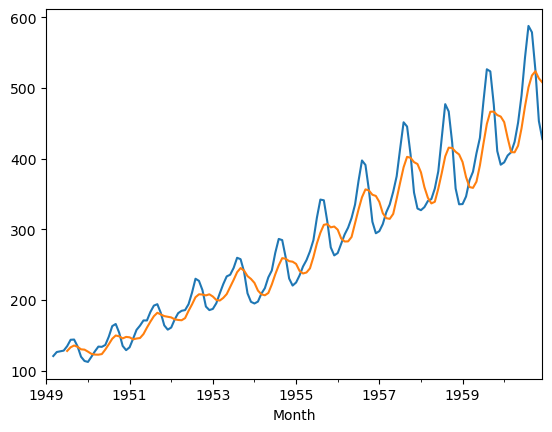

In [81]:
pasajeros['PMS-3'].plot()
pasajeros['PMS-7'].plot()

In [76]:
#promedio movil centrado
pasajeros['PMC-3'] = pasajeros['Thousands of Passengers'].rolling(window=3, center=True).mean()
pasajeros['PMC-7'] = pasajeros['Thousands of Passengers'].rolling(window=7, center=True).mean()

<AxesSubplot:xlabel='Month'>

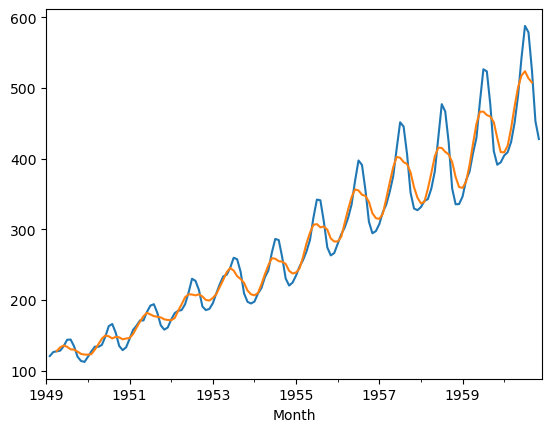

In [82]:
pasajeros['PMC-3'].plot()
pasajeros['PMC-7'].plot()

<AxesSubplot:xlabel='Month'>

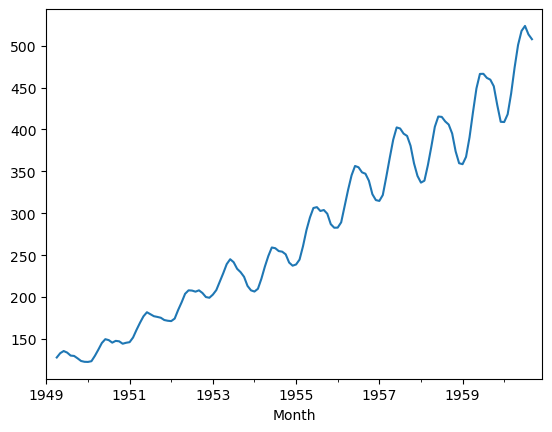

In [78]:
pasajeros['PMC-7'].plot()